# 국민연금 데이터를 통해 유니콘 기업 찾기

## 1. 유니콘 기업이란? 
### 기업 가치가 10억 달러(=1조 원) 이상이고 창업한 지 10년 이하인 비상장 스타트업 기업
    1. 데이터에 창업일이 없어 '창업한 지 10년 이하' 조건은 고려하지 않기로 함
    2. 유니콘 기업을 찾는 일 == 주어진 데이터를 통해 기업 가치를 측정하는 일
    3. 조건을 만족하는 기업이 없을 경우 성장성을 바탕으로 유니콘 기업을 예상해볼 계획

## 2. 국민연금 데이터와 기업 규모의 상관관계
국민연금이 기업가치를 얼마나 대변하는가?

국민연금 -> 급여를 예측할 수 있음 -> 급여를 통해서 기업가치를 갈음할 수 있는가?

기업가치 산정방법?



## 3. EDA

In [1]:
#데이터 불러오기
import pandas as pd
import numpy as np
data = pd.read_csv('company_nps_data.csv',encoding='cp949')

In [16]:
#변수명 확인
data.columns

Index(['회사ID', '연매출액', '년도', '월', '월별_연금보험료', '월별_직원수'], dtype='object')

* 우리는 '연매출액','월별_연금보험료','월별_직원수'를 통해 기업가치를 측정해야 한다

### 1. 회사ID를 기준으로 데이터 묶기, 년월을 기준으로 Sorting

In [173]:
#회사ID를 기준으로 묶기
dct = {}
for i in data.groupby('회사ID'):
    dct[i[0]] = i[1].sort_values(['년도', '월']) #데이터를 시간순서대로 활용할려면 dct에 저장되는 데이터를 index순서대로 활용하면 됨

In [174]:
#회사ID별 평균값 도출
dct_mean = {}
for i in dct.keys():
    dct_mean[i] = dct[i].mean()

In [175]:
dct_mean_df = pd.DataFrame(dct_mean).T #dict를 dataframe으로 전환
dct_mean_df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,1인당 매출액,1인당 연금보험료,점수
63,63.0,1.132878e+10,2018.0,6.5,4.101282e+08,1007.166667,0.244937,0.840030,1.084967
95,95.0,6.569474e+08,2018.0,6.5,2.148378e+08,541.000000,0.053306,0.817888,0.871194
102,102.0,7.426589e+08,2018.0,8.5,1.737695e+08,752.125000,0.048982,0.451845,0.500827
295,295.0,8.377670e+07,2018.0,8.5,7.731204e+07,259.500000,0.036326,0.599640,0.635966
414,414.0,1.973277e+07,2018.0,6.5,7.759019e+07,247.583333,0.031629,0.633169,0.664798


### 2. Scatter Plot

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정

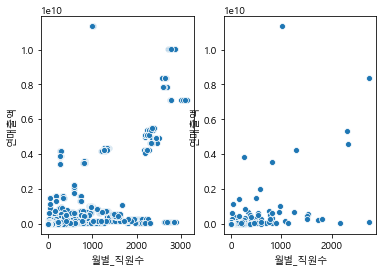

In [6]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data=data, x="월별_직원수", y="연매출액",ax=ax[0])
sns.scatterplot(data=dct_mean_df, x="월별_직원수", y="연매출액",ax=ax[1])

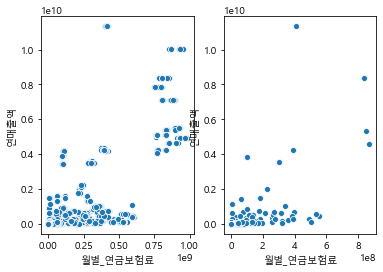

In [8]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data=data, x="월별_연금보험료", y="연매출액",ax=ax[0])
sns.scatterplot(data=dct_mean_df, x="월별_연금보험료", y="연매출액",ax=ax[1])

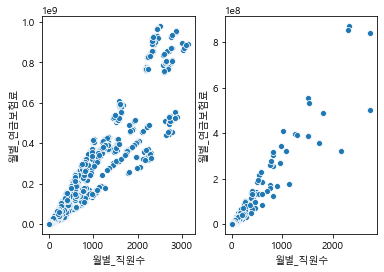

In [9]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data=data, x="월별_직원수", y="월별_연금보험료",ax=ax[0])
sns.scatterplot(data=dct_mean_df, x="월별_직원수", y="월별_연금보험료",ax=ax[1])

* 직원수와 연금보험료는 뚜렷한 선형관계를 보임

### 추가변수 만들어보기

In [18]:
data['1인당 매출액'] = data['연매출액'] / data['월별_직원수'] 
data['1인당 연금보험료'] = data['월별_연금보험료'] / data['월별_직원수']
data['매출액 대비 연금보험료'] = data['월별_연금보험료'] / data['연매출액']

In [11]:
data[np.isinf(data)] = 0 #0으로 나눠서 발생하는 무한값 제거

#### 1인당 매출액 그래프

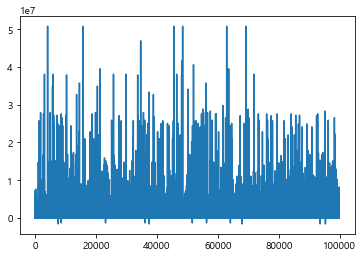

In [12]:
plt.plot(data['1인당 매출액'])

In [13]:
data[data['1인당 매출액']>40000000].drop_duplicates(subset = '회사ID',keep='last') #중복제거

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,1인당 매출액,1인당 연금보험료,매출액 대비 연금보험료
51998,297874,1501348760,2017,4,8294540,37,4.057699e+07,224176.756757,0.005525
69287,433492,152354246,2016,11,681380,3,5.078475e+07,227126.666667,0.004472


#### 1인당 연금보험료 그래프

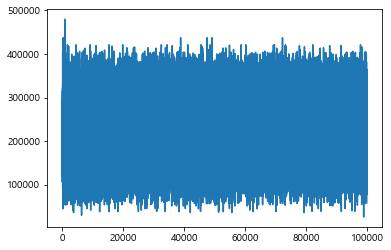

In [14]:
plt.plot(data['1인당 연금보험료'])

In [15]:
data[data['1인당 연금보험료']>430000].drop_duplicates(subset = '회사ID',keep='last') #중복제거

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,1인당 매출액,1인당 연금보험료,매출액 대비 연금보험료
785,228293,9153391,2016,8,7677140,16,572086.937500,479821.25,0.838721
72163,3312354,1451563,2019,12,1312200,3,483854.333333,437400.00,0.903991


#### 매출액 대비 연금보험료 그래프

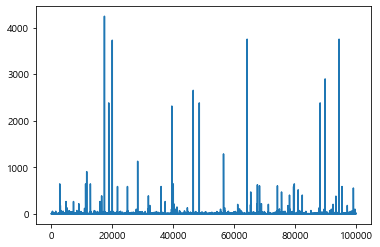

In [20]:
plt.plot(data['매출액 대비 연금보험료'])

In [21]:
data[data['매출액 대비 연금보험료']>1000].drop_duplicates(subset = '회사ID',keep='last') #중복제거

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,1인당 매출액,1인당 연금보험료,매출액 대비 연금보험료
56431,570867,1500,2019,2,1931400,9,166.666667,214600.0,1287.60000
89748,81619,507,2018,10,1468800,4,126.750000,367200.0,2897.04142
94322,566173,300,2018,11,1125000,4,75.000000,281250.0,3750.00000


* 연매출액이 1500원인데 연금보험료를 1931400을 낸다?

## 4. 외부데이터 활용

현재 유니콘 기업의 매출액, 연금보험료, 직원수를 활용한 선형회귀분석 실행

데이터의 신뢰도가 높지 않으며 연금보험료 =  평균연봉 * 직원수*9%로 추정

In [55]:
unicon = pd.read_csv('unicon.csv',encoding='cp949')
unicon = unicon.dropna()

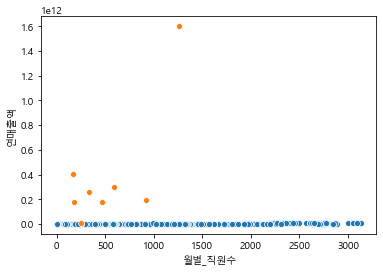

In [89]:
sns.scatterplot(data=data, x="월별_직원수", y="연매출액")
sns.scatterplot(data=unicon, x="월별_직원수", y="연매출액")

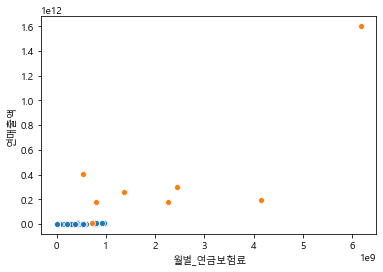

In [90]:
sns.scatterplot(data=data, x="월별_연금보험료", y="연매출액")
sns.scatterplot(data=unicon, x="월별_연금보험료", y="연매출액")

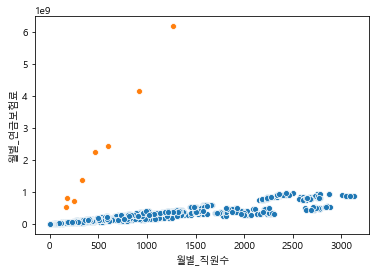

In [91]:
sns.scatterplot(data=data, x="월별_직원수", y="월별_연금보험료")
sns.scatterplot(data=unicon, x="월별_직원수", y="월별_연금보험료")

In [71]:
from sklearn.linear_model import LinearRegression
line= LinearRegression()
line.fit(unicon.drop(['기업가치','기업','평균예상연봉'],axis=1), unicon['기업가치'])

LinearRegression()

In [72]:
y_predicted = line.predict(data[['연매출액','월별_연금보험료','월별_직원수']])

In [73]:
y_predicted

array([-4.59860121e+17, -4.86206199e+16, -4.03029527e+16, ...,
       -2.02507701e+16, -4.51325659e+16, -1.50589359e+16])

In [74]:
data['예상_기업가치'] = y_predicted

In [80]:
data['예상_기업가치'].nlargest(15)

54026    4.710263e+12
33869    4.710263e+12
82809    4.710263e+12
4450     4.710263e+12
20070    4.710263e+12
6162     4.710262e+12
12176    4.710262e+12
39671    4.710261e+12
64139    4.710259e+12
7251     4.710255e+12
93481    4.710255e+12
49592    4.710255e+12
69239    4.710204e+12
6279    -4.639149e+15
98775   -5.382166e+15
Name: 예상_기업가치, dtype: float64

### 결론
* 외부데이터가 많지 않아 분석이 유의미하지 않음
* 외부데이터를 활용할려면 코스피기업의 데이터를 활용하는 게 더 합리적이라고 판단됨

## 5. 가설 설정

##### 유니콘 기업은 '효율적인' 기업일 것이다
* 적은 직원으로 높은 매출액을 내는 기업이 유니콘일 가능성이 크다

##### 유니콘 기업은 '인적자원'을 중시하는 기업일 것이다
* 1인당 연금보험료를 높게 측정하고 있는 기업이 유니콘일 가능성이 크다

### '1인당_매출액' 과 '1인당_연금보험료'를 활용한 점수계산

##### Case1. 두 변수 각각의 ranking을 합산
* 1인당 매출액 순위 + 1인당 연금보험료 순위 = 점수

In [276]:
data = pd.read_csv('company_nps_data.csv',encoding='cp949')

In [277]:
data['1인당 매출액'] = data['연매출액'] / data['월별_직원수'] 
data['1인당 연금보험료'] = data['월별_연금보험료'] / data['월별_직원수']
data[np.isinf(data)] = 0 #0으로 나눠서 발생하는 무한값 제거

In [278]:
import scipy.stats as ss

In [279]:
data = pd.read_csv('company_nps_data.csv',encoding='cp949')
data['1인당 매출액'] = data['연매출액'] / data['월별_직원수'] 
data['1인당 연금보험료'] = data['월별_연금보험료'] / data['월별_직원수']
data[np.isinf(data)] = 0 #0으로 나눠서 발생하는 무한값 제거


In [280]:
def binding(data):
     #회사ID를 기준으로 묶기
    dct = {}
    for i in data.groupby('회사ID'):
        dct[i[0]] = i[1].sort_values(['년도', '월']) #데이터를 시간순서대로 활용할려면 dct에 저장되는 데이터를 index순서대로 활용하면 됨
    #회사ID별 평균값 도출
    dct_mean = {}
    for i in dct.keys():
        dct_mean[i] = dct[i].mean()
    dct_mean_df = pd.DataFrame(dct_mean).T #dict를 dataframe으로 전환   
    return dct_mean_df

In [281]:
dct_mean_df = binding(data)

In [298]:
dct_mean_df['1인당 매출액 순위'] = ss.rankdata(dct_mean_df['1인당 매출액'])
dct_mean_df['1인당 연금보험료 순위'] = ss.rankdata(dct_mean_df['1인당 연금보험료'])
dct_mean_df['점수'] = dct_mean_df['1인당 매출액 순위'] + dct_mean_df['1인당 연금보험료 순위']

In [309]:
dct_mean_df.sort_values(by=['점수'],ascending = False).head(10)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,1인당 매출액,1인당 연금보험료,1인당 매출액 순위,1인당 연금보험료 순위,점수
63,63.0,1.132878e+10,2018.000000,6.500000,4.101282e+08,1007.166667,1.124874e+07,407239.467496,4988.0,4995.0,9983.0
60154,60154.0,5.080587e+07,2018.000000,8.000000,2.477320e+06,6.333333,8.171949e+06,390976.190476,4977.0,4991.0,9968.0
294649,294649.0,3.836737e+09,2016.894737,6.763158,1.029398e+08,270.473684,1.418880e+07,380563.578053,4990.0,4976.0,9966.0
293402,293402.0,3.413610e+07,2018.000000,6.500000,1.501150e+06,4.000000,9.102960e+06,381050.000000,4983.0,4978.0,9961.0
5452,5452.0,2.523765e+08,2018.000000,7.500000,1.534591e+07,39.700000,6.358736e+06,386545.948530,4972.0,4987.0,9959.0
64324,64324.0,5.540396e+07,2018.000000,8.500000,1.872410e+06,5.000000,1.108079e+07,374482.000000,4985.0,4963.0,9948.0
40860,40860.0,1.709144e+08,2018.000000,6.500000,2.570220e+06,7.000000,2.441635e+07,367174.285714,4997.0,4944.0,9941.0
381180,381180.0,1.459657e+09,2016.894737,6.763158,6.377902e+07,170.605263,8.575456e+06,374044.555746,4979.0,4962.0,9941.0
126831,126831.0,2.019423e+09,2016.894737,6.763158,2.276844e+08,584.078947,3.457156e+06,389804.704049,4916.0,4990.0,9906.0
419998,419998.0,3.538393e+09,2017.000000,6.500000,3.026178e+08,812.444444,4.355804e+06,372419.518004,4943.0,4959.0,9902.0


##### Case2. 두 변수를 0-1사이의 값으로 스케일링 한 뒤 단순합산
* scaled_1인당 매출액 + scaled_1인당 연금보험료 = 점수

In [284]:
from sklearn.preprocessing import MinMaxScaler

In [285]:
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(data[['1인당 매출액','1인당 연금보험료']])
data[['1인당 매출액','1인당 연금보험료']] = min_max_scaler.transform(data[['1인당 매출액','1인당 연금보험료']])
data['점수'] = data['1인당 매출액'] + data['1인당 연금보험료']

In [286]:
dct_mean_df2 = binding(data)

In [307]:
dct_mean_df2.sort_values(by=['점수'],ascending = False).head(10)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,1인당 매출액,1인당 연금보험료,점수
40860,40860.0,1.709144e+08,2018.000000,6.500000,2.570220e+06,7.000000,0.496413,0.751726,1.248140
146654,146654.0,6.397783e+08,2016.894737,6.763158,8.863051e+06,26.552632,0.491542,0.679348,1.170890
63,63.0,1.132878e+10,2018.000000,6.500000,4.101282e+08,1007.166667,0.244937,0.840030,1.084967
294649,294649.0,3.836737e+09,2016.894737,6.763158,1.029398e+08,270.473684,0.301086,0.781236,1.082323
567650,567650.0,1.136639e+08,2018.000000,8.000000,5.035667e+05,3.000000,0.753696,0.312429,1.066124
297874,297874.0,1.162102e+09,2016.894737,6.763158,8.311988e+06,37.500000,0.621420,0.428617,1.050037
433492,433492.0,9.753366e+07,2016.384615,6.884615,1.021949e+06,4.076923,0.542416,0.481355,1.023771
64324,64324.0,5.540396e+07,2018.000000,8.500000,1.872410e+06,5.000000,0.241729,0.767833,1.009562
60154,60154.0,5.080587e+07,2018.000000,8.000000,2.477320e+06,6.333333,0.186176,0.804186,0.990362
293402,293402.0,3.413610e+07,2018.000000,6.500000,1.501150e+06,4.000000,0.203956,0.782309,0.986265


##### 두 케이스에 공통으로 상위권을 차지한 5개 기업 추출

In [330]:
a1 = dct_mean_df.sort_values(by=['점수'],ascending = False).head(9).index
a2 = dct_mean_df2.sort_values(by=['점수'],ascending = False).head(9).index
unicon_company = list(set(a1).intersection(a2))
print(str(unicon_company)+"이 유니콘 기업입니다")

[64324, 294649, 60154, 40860, 63]이 유니콘 기업입니다
